<a href="https://colab.research.google.com/github/IrinaBoyarchukova/A_B_test/blob/main/HW_7_%D0%9D%D0%B5%D1%81%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%82%D1%83%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# импорт необходимых библиотек
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm

import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd

# импорт необходимых библиотек
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np


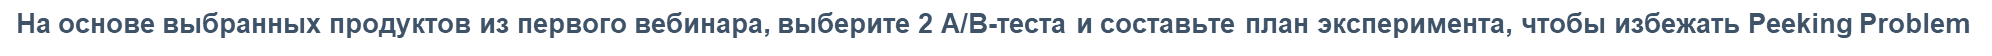

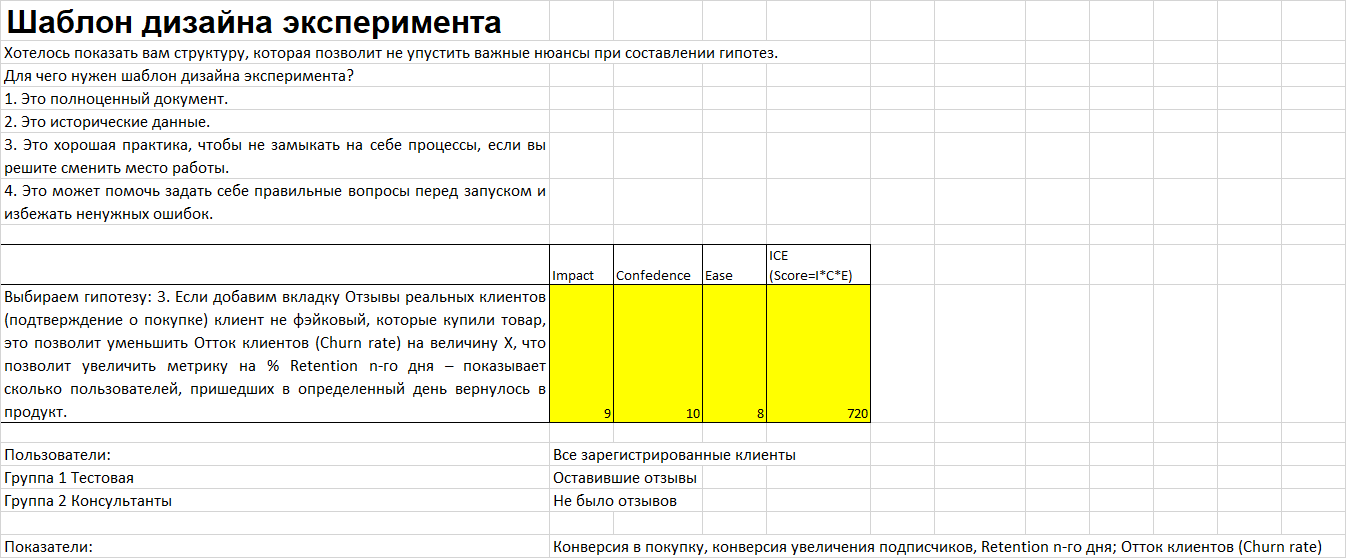

In [4]:
def calc_proportion_es(prob1: float, prob2: float):
    
    return abs(proportion_effectsize(prob1, prob2))

def calc_proportion_es_alt(conv1: float, conv2:float, prob1:float, prob2: float):
    
    return 2  * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))

def calc_continuous_es(mean_control: Union[float, int],
                       std_control: Union[float, int],
                       mean_test: Union[float, int],
                       std_test: Union[float, int]):
    
    return abs(effectsize_smd(mean_control,
                              std_control,
                              1e4,
                              mean_test,
                              std_test,
                              1e4)[0])

def calc_continuous_es_alt(mean_control: Union[float, int],
                           std_control: Union[float, int],
                           mean_test: Union[float, int],
                           std_test: Union[float, int]):
    
    effect_size = (mean_test - mean_control) / ((std_control**2 + std_test**2) / 2) ** 0.5
    return effect_size
    
def calc_sample_size_continuous(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

def calc_sample_size_proportion(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

Выбираем гипотезу: 3. Если добавим вкладку Отзывы реальных клиентов (подтверждение о покупке) клиент не фэйковый, которые купили товар, это позволит уменьшить Отток клиентов (Churn rate) на величину 10%, что позволит увеличить метрику на 20 % Retention n- го дня – показывает сколько пользователей, пришедших в определенный день вернулось в продукт. Средний трафик человек в день 5000.Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%


In [5]:
CR_1, CR_2 = 0.10, 0.12

es_prop = calc_proportion_es(CR_1, CR_2)
es_prop

0.06398210298605855

In [6]:
calc_sample_size_proportion(es_prop)

7669

In [10]:
DAU = 5000

In [11]:
res = 7669 / DAU
res

1.5338

Длительность эксперитмента 2 дня